# **K-NN**

In [1]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
from pandas import Series, DataFrame

df = pd.read_csv('knn_data.csv', encoding='utf-8')
df['longitude'] = pd.to_numeric(df['longitude'])
df['latitude'] = pd.to_numeric(df['latitude'])
df.head()

,longitude,latitude,lang
0,-86.750000,33.566667,Python
1,-88.250000,30.683333,Python
2,-112.016667,33.433333,Java
3,-110.933333,32.116667,Java
4,-92.233333,34.733333,R


predict & evaluate which programming language people use

In [15]:
X = df.drop('lang', axis=1).values
y = df['lang'].values

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

### predict & evaluation

In [18]:
y_pred = knn.predict(X)

In [19]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y, y_pred)

array([[16,  6,  0],
       [ 8, 21,  2],
       [ 2,  5, 15]])

### Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
k_range = range(1,100) # Find out optimal k
k_scores = []

for k in k_range :
	knn = KNeighborsClassifier(k)
	scores = cross_val_score(knn, X, y, cv=5, scoring = "accuracy") # 5-fold cross-validation
	k_scores.append(scores.mean())

In [24]:
import matplotlib.pyplot as plt

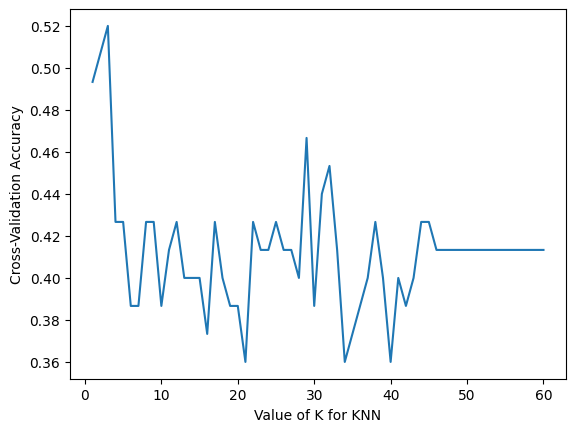

In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()



---


## Hyperparameter tuning

### 1) GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [27]:
grid_params = {
    'n_neighbors' : list(range(1,10)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [28]:
gs = GridSearchCV(knn, grid_params, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=99),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [31]:
print("Best Parameters :", gs.best_params_)
print("Best Score :", gs.best_score_)
print("Best Test Score :", gs.score(X, y))

Best Parameters : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score : 0.52
Best Test Score : 0.7733333333333333



#### Hypertuned model

In [32]:
knn_gs = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='uniform')
knn_gs.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [33]:
score = cross_val_score(knn_gs, X, y, cv=5, scoring="accuracy")
print("Cross validation score :", score)

Cross validation score : [0.46666667 0.6        0.4        0.6        0.53333333]


In [34]:
knn_gs.score(X, y)

0.7733333333333333

In [35]:
confusion_matrix(y, knn_gs.predict(X))

array([[18,  4,  0],
       [ 6, 24,  1],
       [ 2,  4, 16]])

### 2) Randomized GridSearch

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
rgs = RandomizedSearchCV(knn, grid_params, cv=5, n_iter=20)

In [38]:
rgs.fit(X, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=99),
                   n_iter=20,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'weights': ['uniform', 'distance']})

In [39]:
print("Best Parameters :", rgs.best_params_)
print("Best Score :", rgs.best_score_)
print("Best Test Score :", rgs.score(X, y))

Best Parameters : {'weights': 'uniform', 'n_neighbors': 2, 'metric': 'euclidean'}
Best Score : 0.5066666666666666
Best Test Score : 0.7866666666666666



### Hypertuned model

In [40]:
knn_rgs = KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='uniform')
knn_rgs.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [41]:
score2 = cross_val_score(knn_rgs, X, y, cv=5, scoring="accuracy")
print("Cross validation score :", score2)

Cross validation score : [0.53333333 0.66666667 0.33333333 0.6        0.4       ]


In [42]:
knn_rgs.score(X, y)

0.7866666666666666

In [43]:
confusion_matrix(y, knn_rgs.predict(X))

array([[22,  0,  0],
       [10, 21,  0],
       [ 1,  5, 16]])